# Queueing Process Erlang B#


When the input process is Poisson process, and the queueing decipline is occupied without quequeing, no matter what the service respond is, the queueing process can be discribe in Erlang B.

Here we discribe the arriving time as Poisson Process for the interval between two input is exponential distribution with an arriving rate $\lambda$. The system respond could be any distribution with expectation $\tau$ (here we supposed the system resopnd is also exponential distribution, $\tau = \frac{1}{\lambda}$).

When all the service are occupied, the input will not queue but they will be block instantly.

ErlangB shows the probability that the system will come up with block

$$E(a,s) = \frac{a^s/s!}{\sum_{k=0}^s a^k/k!}$$

The simmulation shows that both the ratio between **block input number of times** and **total input number of times** and the ratio between **the sum of time that all the service are occupied** and **the total time** are close to ErlangB.

block_arr_rate: 0.18161434977578475
block_time_rate: 0.2028
Erlang: 0.21458234310734736


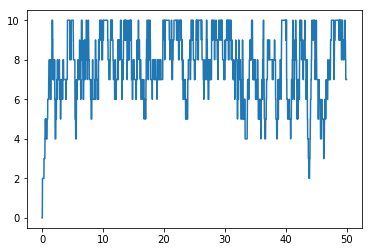

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

end_time = 50
sample_rate = 0.005
x = np.arange(0, end_time, sample_rate);
y = np.zeros(np.shape(x))

res = np.zeros((10))
arr_time = 0
block = 0
enter = 0

while 1:
    arr_time = arr_time + np.random.exponential(0.1)
    handel_time = np.random.exponential(1)
    if arr_time < end_time:
        arr_ind = int(arr_time//sample_rate)
        han_ind = int(handel_time//sample_rate)
        if y[arr_ind] < 10:
            y[arr_ind:arr_ind+han_ind] += 1
        else:
            block += 1
        enter += 1
    else:
        break

plt.plot(x,y)

block_fre = 0
for i in y:
    if i == 10:
        block_fre += 1
block_arr_rate = block/enter
block_time_rate = block_fre/len(y)

print ("block_arr_rate:", block_arr_rate )
print ("block_time_rate:",  block_time_rate)

m = 0
for k in range(0,11):
    m += (10**k)/math.factorial(k)
    
Erlang = ((10**10)/math.factorial(10))/m

print("Erlang:",Erlang)